In [91]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler

In [92]:
def load_data(filename):
    X = []
    y = []
    with open(filename, 'r') as file:
        for line in file:
            values = [float(x) for x in line.strip().split(',') if x]
            if len(values) >= 3:
                X.append(values[:2])
                y.append(values[2])

    return np.array(X), np.array(y)

In [93]:
def sigmoid(z):
    return 1 / (1 + np.exp(-z))

In [94]:
def initialize_weights(n_features):
    return np.random.randn(n_features), np.random.randn(1)[0]

In [95]:
def compute_log_loss(y_true, y_pred):
    epsilon = 1e-15
    y_pred = np.clip(y_pred, epsilon, 1 - epsilon)
    return -np.mean(y_true * np.log(y_pred) + (1 - y_true) * np.log(1 - y_pred))

In [96]:
def train_perceptron(X, y, learning_rate = 0.01, epochs = 1000):
    n_samples, n_features = X.shape
    weights, bias = initialize_weights(n_features)

    decision_boundaries = []
    errors = []
    initial_weights = weights.copy()
    initial_bias = bias 

    for epoch in range(epochs):
        z = np.dot(X, weights) + bias
        y_pred = sigmoid(z)

        d_weights = np.dot(X.T, (y_pred - y)) / n_samples
        d_bias = np.mean(y_pred - y)

        #update weights and bias
        weights -= learning_rate * d_weights
        bias -= learning_rate * d_bias

        #store decision boundary every 100 epochs
        if epoch % 100 == 0:
            decision_boundaries.append((weights.copy(), bias))

        #compute and store error every 10 epochs
        if epoch % 10 == 0:
            error = compute_log_loss(y, y_pred)
            errors.append(error)

    return weights, bias, initial_weights, initial_bias, decision_boundaries, errors

In [97]:
def plot_decision_boundaries(X, y, initial_weights, initial_bias, decision_boundaries, final_weights, final_bias):
    plt.figure(figsize=(10,6))

    #plot data points
    plt.scatter(X[y==1, 0], X[y==1, 1], color='blue', label='Class 1')
    plt.scatter(X[y==0, 0], X[y==0, 1], color='red',  label='Class 0')

    #create grid
    x_min, x_max = X[:, 0].min() - 0.5, X[:, 0].max() + 0.5
    x_points = np.linspace(x_min, x_max, 100)

    #plot initial decison boundary
    y_initial = -(initial_weights[0] * x_points + initial_bias) / initial_weights[1]
    plt.plot(x_points, y_initial, 'r-', label = 'Initial boundary')

    #plot intermediate decison boundaries
    for weights, bias in decision_boundaries[1:-1]:
        y_points = -(weights[0] * x_points + bias) / weights[1]
        plt.plot(x_points, y_points, 'g--', alpha=0.3)

    #plot final decision bounndary
    y_final = -(final_weights[0] * x_points + final_bias) / final_weights[1]
    plt.plot(x_points, y_final, 'k-', label='Final boundary')

    plt.xlabel('Feature 1')
    plt.ylabel('Feature 2')
    plt.legend()
    plt.title('Perceptron Decision Boundaries')
    plt.grid(True)
    plt.show()

def plot_error(errors):
    plt.figure(figsize=(10,6))
    plt.plot(range(0, len(errors) * 10, 10), errors)
    plt.xlabel('Epochs')
    plt.ylabel('Log Loss')
    plt.title('Error vs Epochs')
    plt.grid(True)
    plt.show()


Learning rate: 0.01


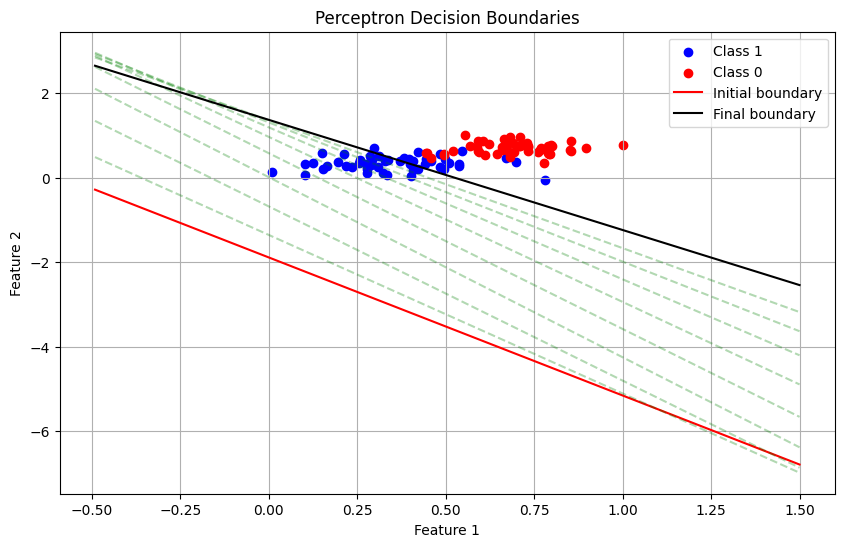

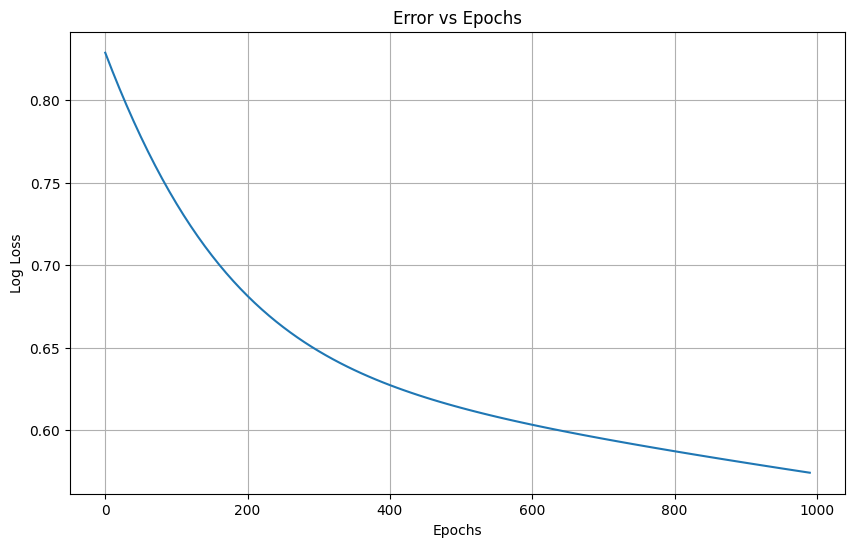

Final weight: [-1.19852039 -0.45985088]
Final bias: 0.6291939350498265
Final error: 0.5741

Learning rate: 0.1


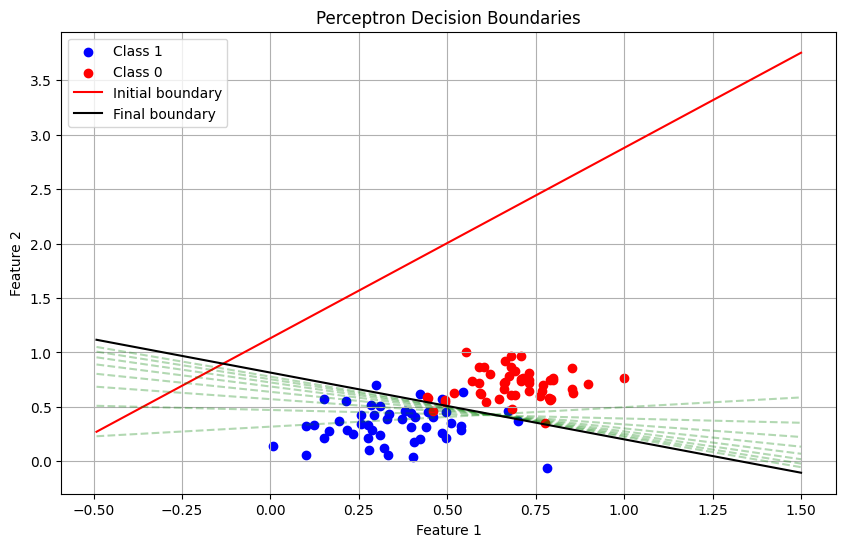

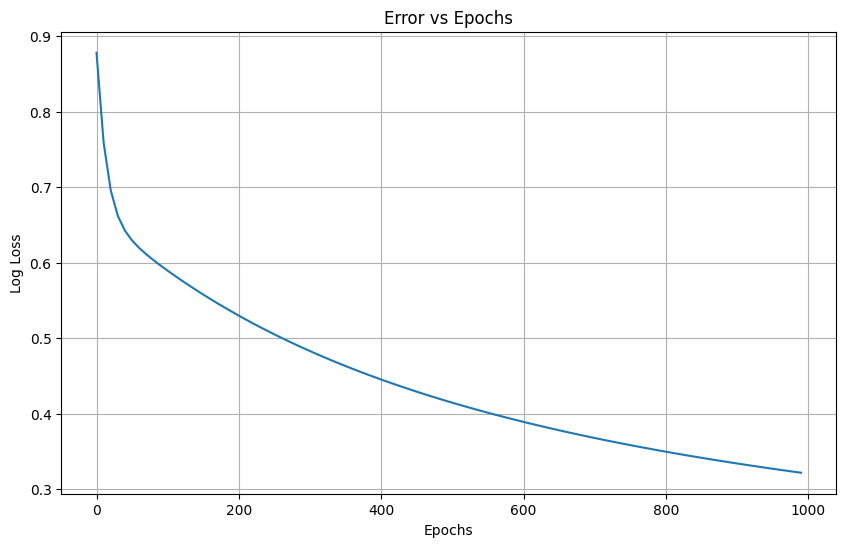

Final weight: [-2.5559156  -4.16907896]
Final bias: 3.395871893470285
Final error: 0.3219

Learning rate: 0.5


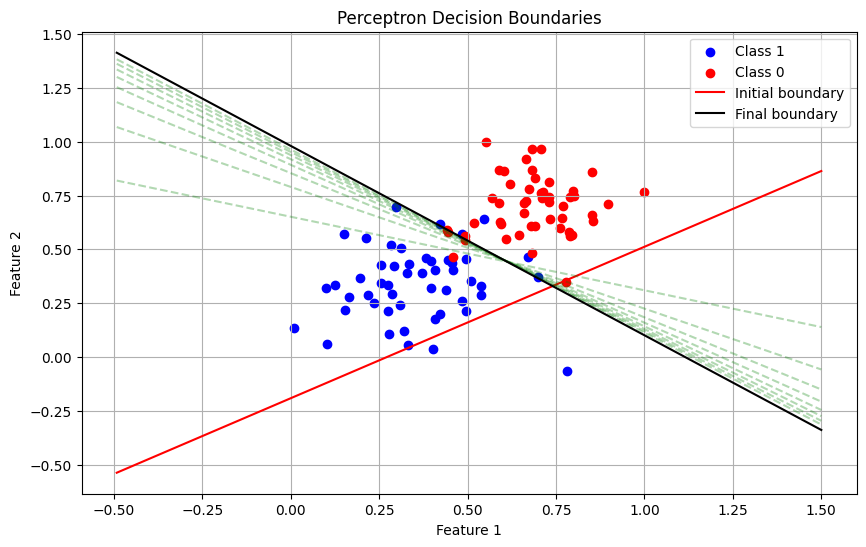

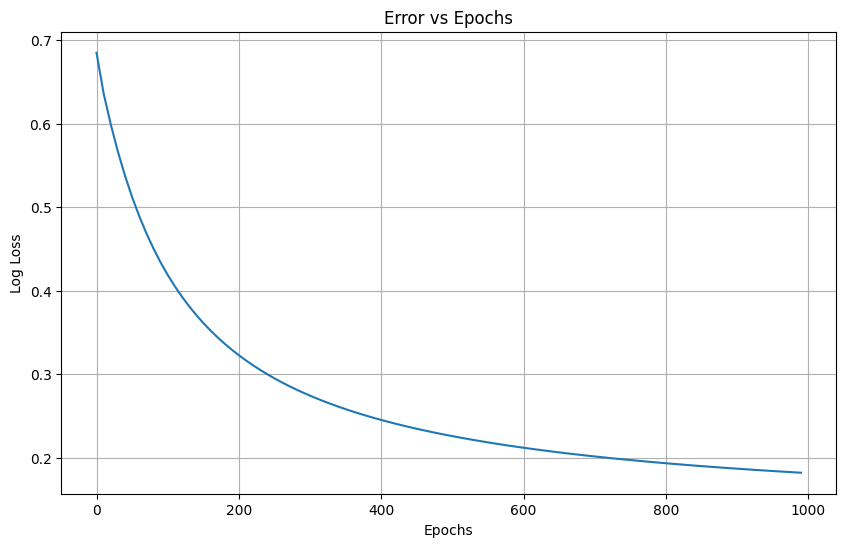

Final weight: [-6.80756961 -7.74148446]
Final bias: 7.591343601407005
Final error: 0.1820


In [98]:
def main():
    #load data
    X, y = load_data('data.csv')

    #training perceptron with different learning rates
    learning_rates = [0.01, 0.1, 0.5]
    epochs = 1000

    for lr in learning_rates:
        print(f"\nLearning rate: {lr}")
        weights, bias, initial_weights, initial_bias, decision_boundaries, errors = train_perceptron(
        X, y, learning_rate=lr, epochs=epochs)

        #plot decision boundaries
        plot_decision_boundaries(X, y, initial_weights, initial_bias, decision_boundaries, weights, bias)

        #plot error
        plot_error(errors)

        print(f"Final weight: {weights}")
        print(f"Final bias: {bias}")
        print(f"Final error: {errors[-1]:.4f}")

if __name__ == "__main__":
    main()
        